In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
df=pd.read_csv('menu.csv')
df

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


In [62]:
# Filter only breakfast items
breakfast_df = df[df['Category'] == 'Breakfast']

In [66]:
# Display unique breakfast items to understand the dataset
breakfast_df['Item'].unique()

array(['Egg McMuffin', 'Egg White Delight', 'Sausage McMuffin',
       'Sausage McMuffin with Egg', 'Sausage McMuffin with Egg Whites',
       'Steak & Egg McMuffin',
       'Bacon, Egg & Cheese Biscuit (Regular Biscuit)',
       'Bacon, Egg & Cheese Biscuit (Large Biscuit)',
       'Bacon, Egg & Cheese Biscuit with Egg Whites (Regular Biscuit)',
       'Bacon, Egg & Cheese Biscuit with Egg Whites (Large Biscuit)',
       'Sausage Biscuit (Regular Biscuit)',
       'Sausage Biscuit (Large Biscuit)',
       'Sausage Biscuit with Egg (Regular Biscuit)',
       'Sausage Biscuit with Egg (Large Biscuit)',
       'Sausage Biscuit with Egg Whites (Regular Biscuit)',
       'Sausage Biscuit with Egg Whites (Large Biscuit)',
       'Southern Style Chicken Biscuit (Regular Biscuit)',
       'Southern Style Chicken Biscuit (Large Biscuit)',
       'Steak & Egg Biscuit (Regular Biscuit)',
       'Bacon, Egg & Cheese McGriddles',
       'Bacon, Egg & Cheese McGriddles with Egg Whites',
       'Sau

In [68]:
# Check for missing values
print(breakfast_df.isnull().sum())

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


In [70]:
# Drop unnecessary columns
columns_to_drop = ['Category', 'Serving Size']
breakfast_df = breakfast_df.drop(columns=columns_to_drop)

In [72]:
# Convert nutrition columns to numeric
nutrition_columns = ['Total Fat', 'Carbohydrates', 'Protein']
breakfast_df[nutrition_columns] = breakfast_df[nutrition_columns].apply(pd.to_numeric, errors='coerce')

In [74]:
# Calculate protein-to-fats/carbs ratio
breakfast_df['Protein_Ratio'] = breakfast_df['Protein'] / (breakfast_df['Total Fat'] + breakfast_df['Carbohydrates'])


In [76]:
# Check for duplicate rows
print(breakfast_df.duplicated().sum())

0


In [78]:
# Convert nutrition columns to numeric
nutrition_columns = ['Calories', 'Total Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Protein']
breakfast_df[nutrition_columns] = breakfast_df[nutrition_columns].apply(pd.to_numeric, errors='coerce')

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

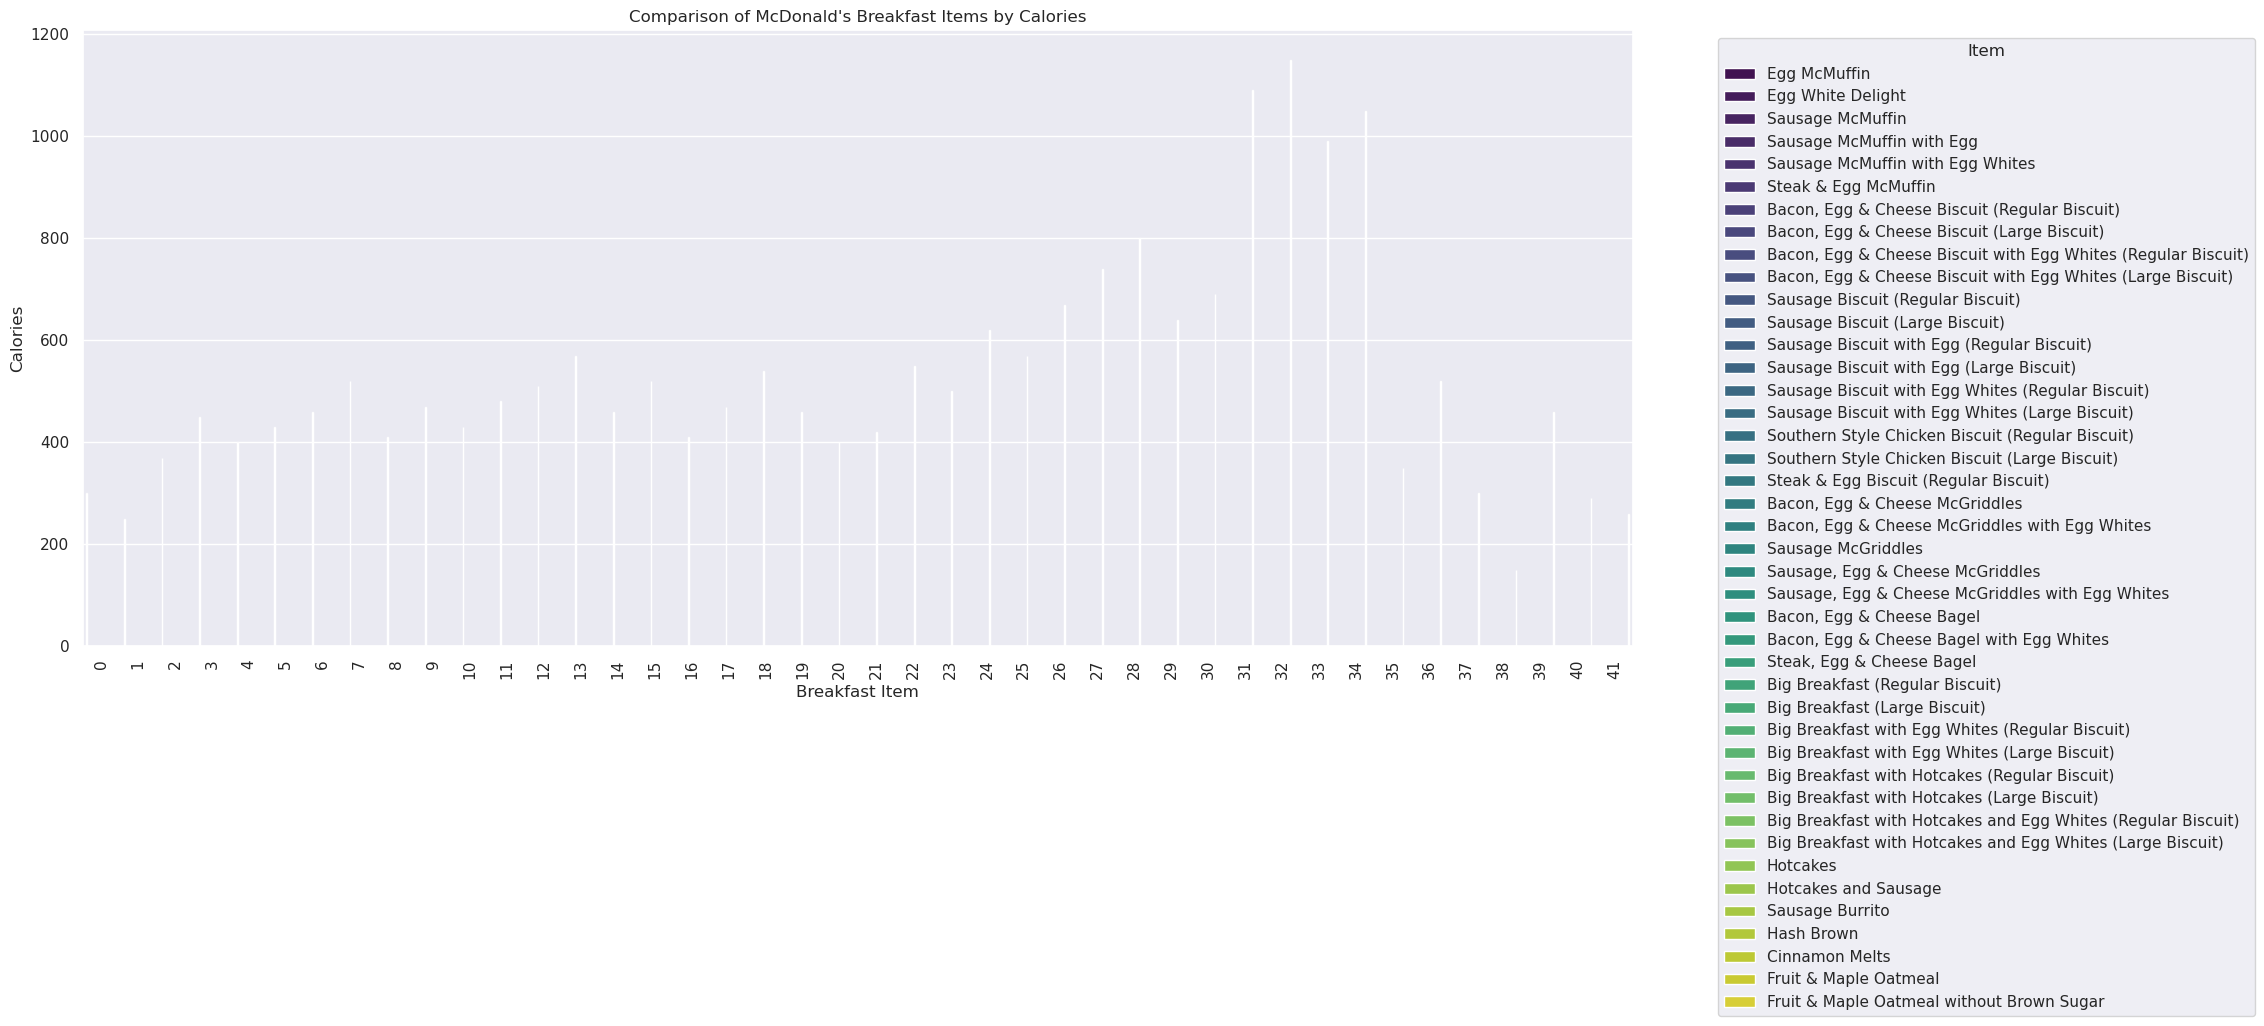

In [80]:
# Create a bar chart comparing each breakfast item to its calories with labels
plt.figure(figsize=(20, 8))
sns.barplot(x=breakfast_df.index, y='Calories', hue='Item', data=breakfast_df, palette='viridis')
plt.title('Comparison of McDonald\'s Breakfast Items by Calories')
plt.xlabel('Breakfast Item')
plt.ylabel('Calories')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# Add legend outside the plot
plt.legend(title='Item', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.show()

/tmp/ipykernel_2712/2681709007.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=row['Total Fat'], y=row['Carbohydrates'], s=row['Protein']*10, alpha=0.5, label=index, cmap='viridis')


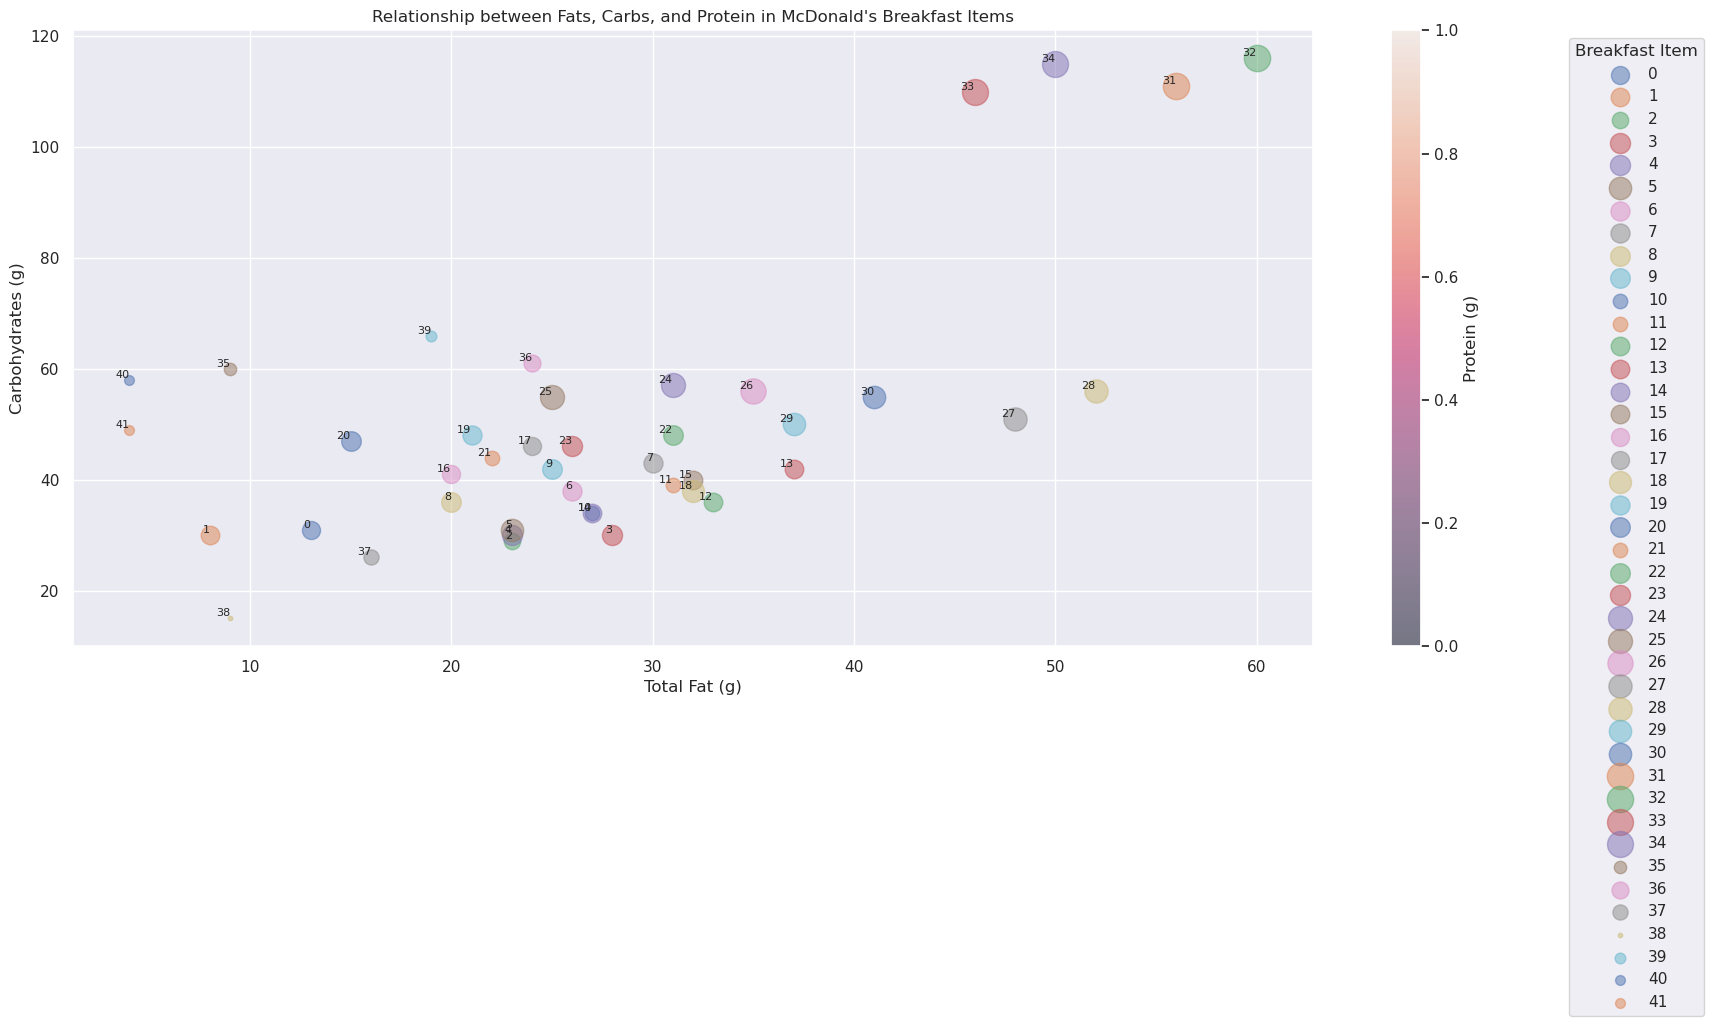

In [102]:
# Create a scatter plot showing the relationship between fats, carbs, and protein with labels and legend
plt.figure(figsize=(20, 8))
for index, row in breakfast_df.iterrows():
    plt.scatter(x=row['Total Fat'], y=row['Carbohydrates'], s=row['Protein']*10, alpha=0.5, label=index, cmap='viridis')
    plt.text(row['Total Fat'], row['Carbohydrates'], index, fontsize=8, ha='right', va='bottom')

plt.title('Relationship between Fats, Carbs, and Protein in McDonald\'s Breakfast Items')
plt.xlabel('Total Fat (g)')
plt.ylabel('Carbohydrates (g)')
plt.colorbar(label='Protein (g)')
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper left', title='Breakfast Item')  # Add legend outside the plot
plt.show()



In [104]:
#This project delved into the analysis and visualization of nutritional data for McDonald's breakfast items. 
#Utilizing a scatter plot, we explored the relationship between fats, carbohydrates, and protein content in each item, 
#with the size of points indicating protein levels and labels providing clarity on specific items. 
#The scatter plot aimed to offer insights into potential healthiness based on a higher protein-to-fats/carbs ratio. 
#Additionally, a bar chart was employed to compare the caloric content of breakfast items, providing a quick 
#overview for identifying healthier and less healthy options based on calorie intake. 
#These visualizations collectively enhance our understanding of the nutritional profiles of McDonald's 
#breakfast offerings, empowering consumers to make informed choices aligned with their dietary preferences 
#and health goals.